In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import statistics as stats
from datetime import datetime
import sklearn.preprocessing as preproc

In [2]:
df1=pd.read_csv('ORG_LSTSPEC.csv')
df2=pd.read_csv('ORG_LSTSPEC_H.csv')

In [3]:
df1.head(2)

,DATAFLOW,LAST UPDATE,freq,animals,unit,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:ORG_LSTSPEC(1.0),02/12/22 23:00:00,A,A1100,HD,AT,2015,15697,NaN
1,ESTAT:ORG_LSTSPEC(1.0),02/12/22 23:00:00,A,A1100,HD,AT,2016,18161,NaN


In [4]:
df2.head(2)

,DATAFLOW,LAST UPDATE,freq,unit,animals,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:ORG_LSTSPEC_H(1.0),13/02/2019 23:00,A,NR,A0019,BE,1999,158,NaN
1,ESTAT:ORG_LSTSPEC_H(1.0),13/02/2019 23:00,A,NR,A0019,BE,2000,262,NaN


In [5]:
df1.shape

(5360, 9)

In [6]:
df2.shape

(4674, 9)

In [7]:
df=pd.concat([df1,df2], ignore_index=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10034 entries, 0 to 10033
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   DATAFLOW     10034 non-null  object
 1   LAST UPDATE  10034 non-null  object
 2   freq         10034 non-null  object
 3   animals      10034 non-null  object
 4   unit         10034 non-null  object
 5   geo          10034 non-null  object
 6   TIME_PERIOD  10034 non-null  int64 
 7   OBS_VALUE    10034 non-null  int64 
 8   OBS_FLAG     197 non-null    object
dtypes: int64(2), object(7)
memory usage: 705.6+ KB


In [9]:
df['unit'].unique()

array(['HD', 'NR'], dtype=object)

In [10]:
df = df.drop(['OBS_FLAG'], axis =1)
df.head(5)

,DATAFLOW,LAST UPDATE,freq,animals,unit,geo,TIME_PERIOD,OBS_VALUE
0,ESTAT:ORG_LSTSPEC(1.0),02/12/22 23:00:00,A,A1100,HD,AT,2015,15697
1,ESTAT:ORG_LSTSPEC(1.0),02/12/22 23:00:00,A,A1100,HD,AT,2016,18161
2,ESTAT:ORG_LSTSPEC(1.0),02/12/22 23:00:00,A,A1100,HD,AT,2017,17273
3,ESTAT:ORG_LSTSPEC(1.0),02/12/22 23:00:00,A,A1100,HD,AT,2018,17752
4,ESTAT:ORG_LSTSPEC(1.0),02/12/22 23:00:00,A,A1100,HD,AT,2019,18678


In [11]:
df.isnull().sum()

DATAFLOW       0
LAST UPDATE    0
freq           0
animals        0
unit           0
geo            0
TIME_PERIOD    0
OBS_VALUE      0
dtype: int64

In [12]:
df.describe()

,TIME_PERIOD,OBS_VALUE
count,10034.000000,1.003400e+04
mean,2011.569065,1.747287e+05
std,5.754753,1.103703e+06
min,1997.000000,0.000000e+00
25%,2007.000000,6.135000e+02
50%,2012.000000,6.242000e+03
75%,2016.000000,4.068050e+04
max,2021.000000,4.266108e+07


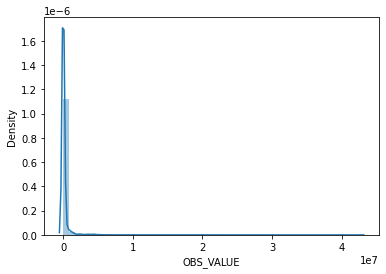

In [13]:
import seaborn as sns
sns.distplot(df["OBS_VALUE"]);

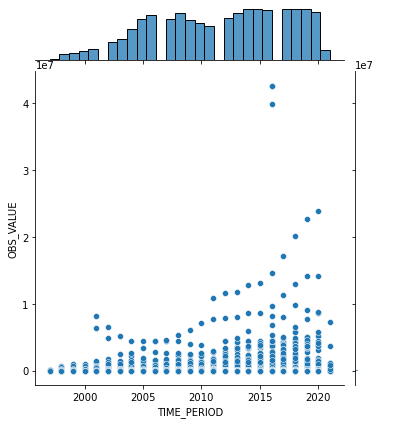

In [14]:
sns.jointplot(x='TIME_PERIOD', y='OBS_VALUE', data=df);

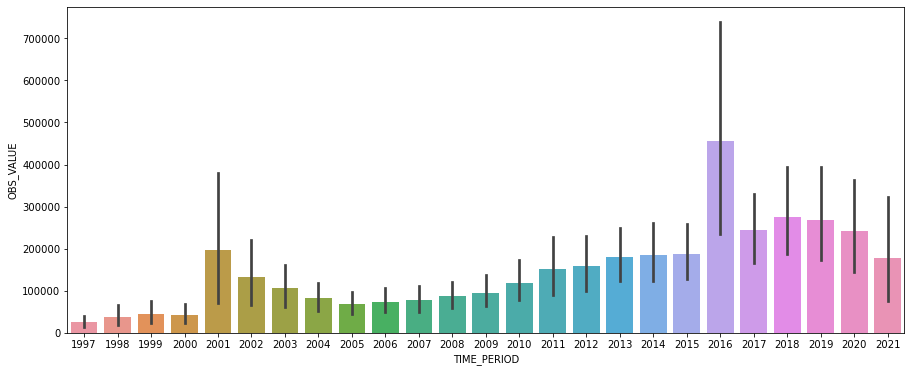

In [15]:
fig, ax = plt.subplots(figsize=(15,6))
ax=sns.barplot(x="TIME_PERIOD", y="OBS_VALUE", data=df )

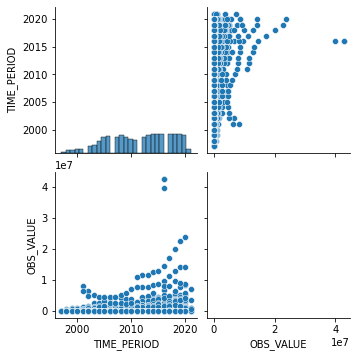

In [16]:
import seaborn as sns
sns.pairplot(df)

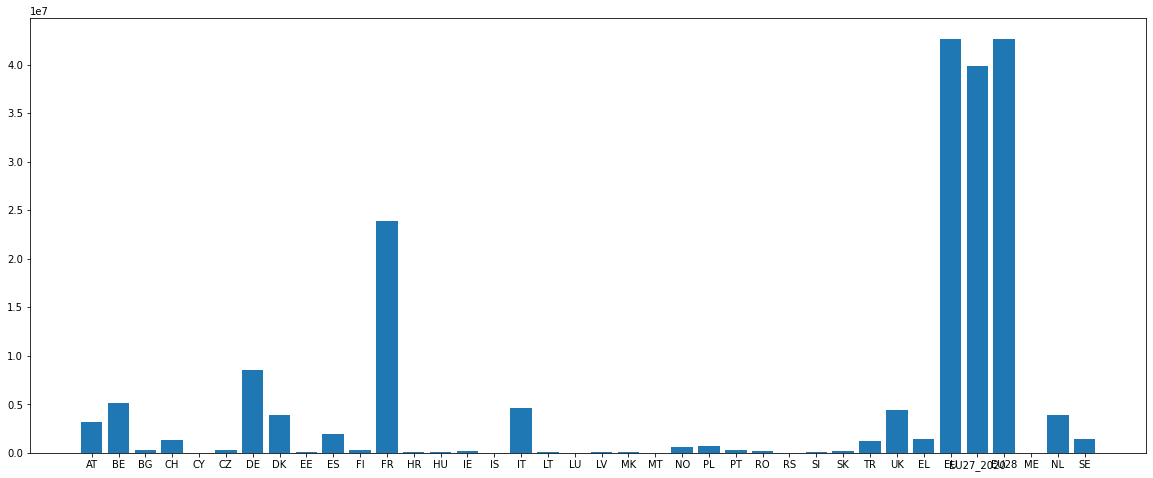

In [17]:
fig, b = plt.subplots(figsize=(20,8))
b = plt.bar(df['geo'], df['OBS_VALUE'])

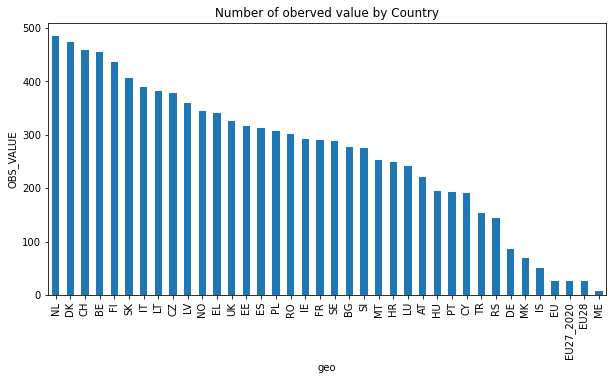

In [18]:
df.geo.value_counts().nlargest(40).plot(kind="bar", figsize=(10,5))
plt.title("Number of oberved value by Country")
plt.ylabel("OBS_VALUE")
plt.xlabel("geo");

,TIME_PERIOD,OBS_VALUE
TIME_PERIOD,1.000000,0.067135
OBS_VALUE,0.067135,1.000000


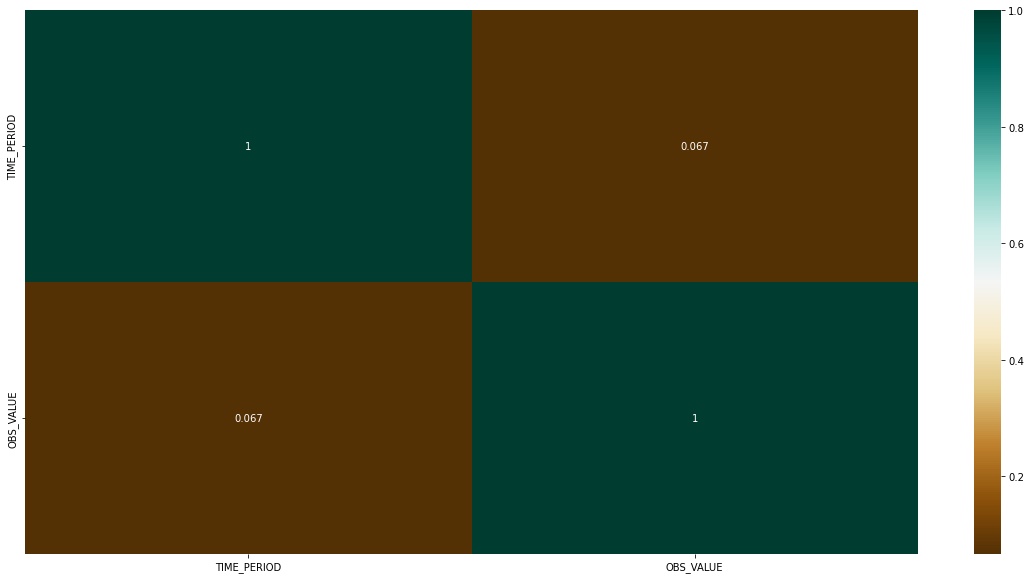

In [19]:
plt.figure(figsize=(20,10))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

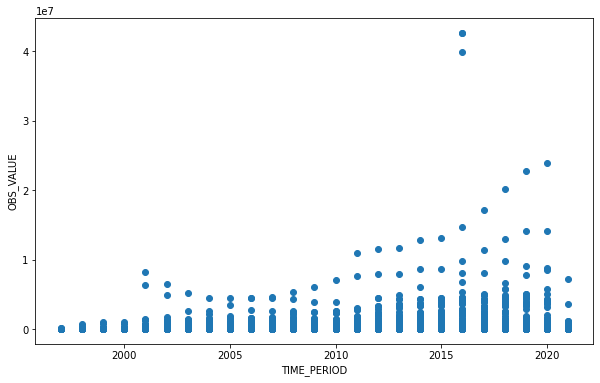

In [20]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df["TIME_PERIOD"], df["OBS_VALUE"])
ax.set_xlabel("TIME_PERIOD")
ax.set_ylabel("OBS_VALUE")
plt.show()

In [21]:
df.describe()

,TIME_PERIOD,OBS_VALUE
count,10034.000000,1.003400e+04
mean,2011.569065,1.747287e+05
std,5.754753,1.103703e+06
min,1997.000000,0.000000e+00
25%,2007.000000,6.135000e+02
50%,2012.000000,6.242000e+03
75%,2016.000000,4.068050e+04
max,2021.000000,4.266108e+07


In [22]:
from numpy.random import randn
np.random.seed(101)

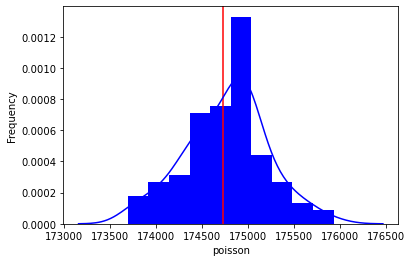

In [23]:
import statistics
from scipy.stats import poisson

x = poisson.rvs(mu =1.747287e+05, size = 101)
plt.axvline(1.747287e+05, color = 'red')
ax = sns.distplot(x, kde= True, color ='blue', hist_kws ={"linewidth":25, 'alpha':1})
ax.set(xlabel='poisson', ylabel='Frequency')
plt.show()

In [24]:
import statistics
from scipy.stats import norm
norm.pdf(1, loc = 1.747287e+05, scale=1.103703e+06 )

3.5695679756489074e-07

[Text(0.5, 0, 'geo'),
 Text(0, 0.5, 'OBS_VALUE'),
 Text(0.5, 1.0, 'Organic meat per country')]

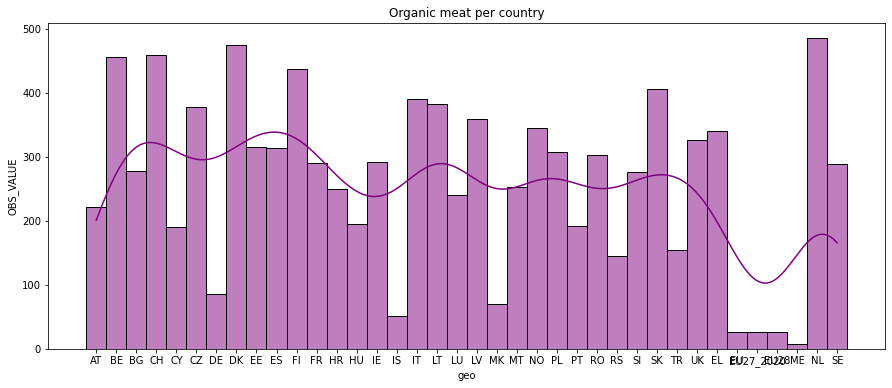

In [25]:
fig, ax = plt.subplots(figsize=(15,6))
ax = sns.histplot(df['geo'],  kde=True, color ='Purple', bins=50)
ax.set(xlabel='geo', ylabel='OBS_VALUE', title ='Organic meat per country')

In [26]:
#sns.histplot(df)

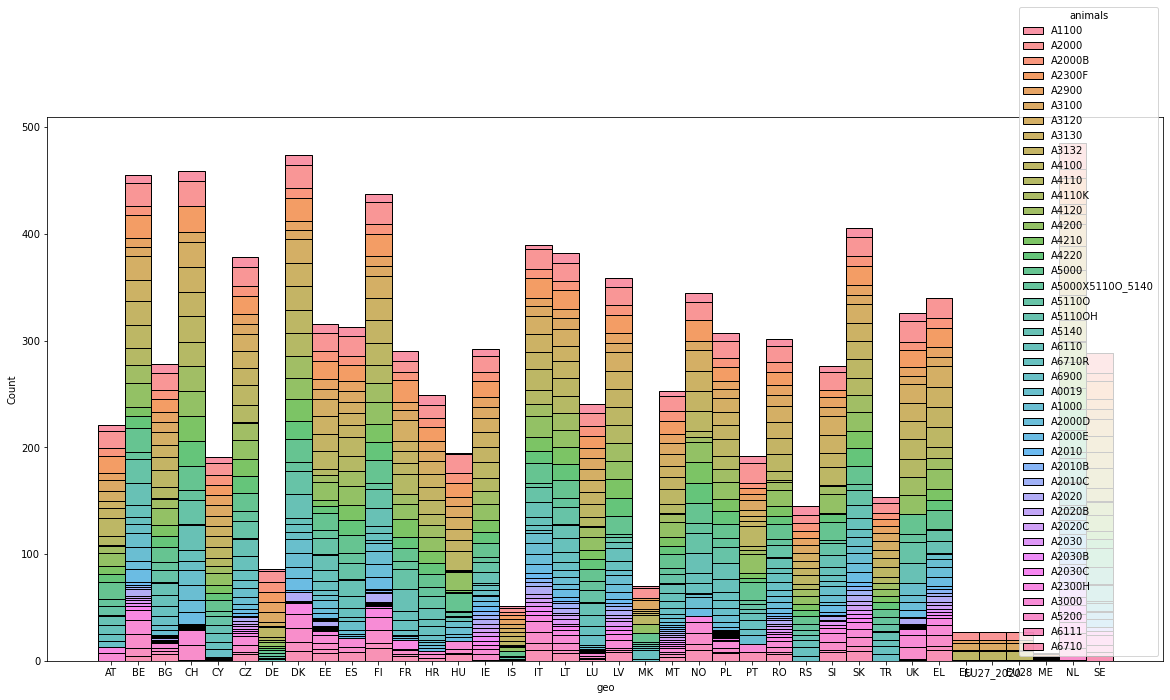

In [27]:
fig, g = plt.subplots(figsize=(20,10))
g=sns.histplot(data=df, x='geo', hue ="animals", multiple="stack")


# Sentimental Analysis


In [28]:
pip install tweepy

  Using cached requests-2.28.1-py3-none-any.whl (62 kB)
  Attempting uninstall: requests
    Found existing installation: requests 2.25.0
    Uninstalling requests-2.25.0:
      Successfully uninstalled requests-2.25.0
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.4 requires pathlib, which is not installed.
twitter-stream-py 0.8.8 requires requests==2.25.0, but you have requests 2.28.1 which is incompatible.


In [29]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [30]:
pip install twitter-stream.py


Note: you may need to restart the kernel to use updated packages.
  Using cached requests-2.25.0-py2.py3-none-any.whl (61 kB)

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.4 requires pathlib, which is not installed.
tweepy 4.12.1 requires requests<3,>=2.27.0, but you have requests 2.25.0 which is incompatible.



  Attempting uninstall: requests
    Found existing installation: requests 2.28.1
    Uninstalling requests-2.28.1:
      Successfully uninstalled requests-2.28.1


In [31]:
pip install python-dotenv

Note: you may need to restart the kernel to use updated packages.


In [32]:
# Import tweepy to work with the twitter API
import tweepy as tw

# Import numpy and pandas to work with dataframes
import numpy as np
import pandas as pd

# Import seaborn and matplotlib for viz
from matplotlib import pyplot as plt

In [33]:
#api key X4iRqhsu31Aq7Vp9USaWRUx3a
#API Key Secret AUjlC0TwnifOsUgos6GwYYZCqdtgQIfLNJ1w04Wyw1AOKgHn5J
#Bearer Token AAAAAAAAAAAAAAAAAAAAANrmkQEAAAAAJt2rO2uHekkkcfEpPErA1UEgQKI%3DY9Hm1Mbu7Cx29cuyLa52AVLeuySfYevXObtOXamfElylGST27Y

In [34]:
from dotenv import dotenv_values

config = dotenv_values(".env")

# your Twitter API key and API secret
# We won't be using these variables, they're just for demonstration.
my_api_key = config["X4iRqhsu31Aq7Vp9USaWRUx3a"]
my_api_key_secret = config["AUjlC0TwnifOsUgos6GwYYZCqdtgQIfLNJ1w04Wyw1AOKgHn5J"]

KeyError: 'X4iRqhsu31Aq7Vp9USaWRUx3a'

consumer_key='X4iRqhsu31Aq7Vp9USaWRUx3a'
consumer_secret='AUjlC0TwnifOsUgos6GwYYZCqdtgQIfLNJ1w04Wyw1AOKgHn5J'
access_token='1342236145434943488-13TP3UEb1OcMatWJffHT3rd9sRlEZd'
access_token_secret='E7iMv64x46Yd5ZxsmD5vKDF6Jsr9j54bcOIfK2TqkRBMR'

# Authenticate
auth = tw.OAuthHandler(consumer_key, consumer_secret)
# Set Tokens
auth.set_access_token(access_token, access_token_secret)
# Instantiate API
api = tw.API(auth, wait_on_rate_limit=True)

hashtag = "#presidentialdebate"
query = tw.Cursor(api.search, q=hashtag).items(1000)
tweets = [{'Tweet':tweet.text, 'Timestamp':tweet.created_at} for tweet in query]
print(tweets)